# Esercizio 10.2

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.mlab as mlab
import numpy as np
import math
import scipy.stats
from itertools import cycle
from IPython.display import clear_output
import time
import scipy
from scipy.optimize import curve_fit
import subprocess
import os
import matplotlib.collections as collections
import matplotlib.ticker as ticker

L'esercizio consiste nella parallelizzazione dell'algoritmo genetico usato per risolvere il TSP problem, utilizzando utilizzare le librerie MPI. Permettono di parallelizzare un programma con un modello SPMD ed eseguirlo contemporanemente su più core (in questo caso su 4).

Durante la parallelizzazione i processi (o *continenti*) si scambiano il loro migliore individuo in maniera casuale ogni $n_\text{migr}$ generazioni. La domanda che ci poniamo è se la parallelizzazione ci consente di ottenere risultati migliori.

Il numero di generazioni è fissato a 200; utilizzando $n_\text{migr}=10$ si nota che che i 4 processi arrivano alla stessa soluzione, coincidente con quella ottenuta nell'Esercitazione 9. L'andamento di $L_1$ al crescere delle generazioni è molto simile a quello osservato per un singolo processo; si può notare che l'introduzione delle migrazioni fa sì che la fitness saturi (ciò si raggiunga la configurazione migliore) ad un numero di generazioni minore rispetto al caso di un processo singolo.

## Configurazione iniziale

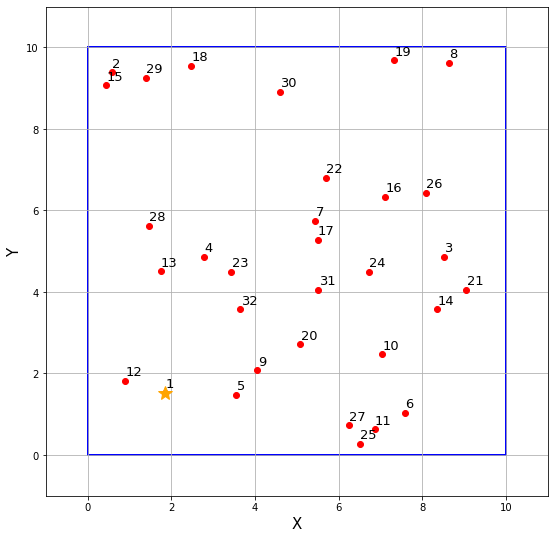

In [2]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot()

x, y = (np.genfromtxt("config_s.dat", usecols=kk, autostrip=True) for kk in range(2))

for i in range(len(x)):
    plt.plot(x[i], y[i],'ro')
    plt.annotate(i+1,(x[i],y[i]),xytext=(x[i]+0.01, y[i]+0.13), size=13)
    
rect = plt.Rectangle((0., 0.), 10, 10, facecolor='none', edgecolor='b',linewidth=2.0, alpha=1)
ax.add_patch(rect)
ax.grid(True)
ax.plot(x[0],y[0],'*', markersize=15, color='orange')
ax.set_xlabel("X", fontsize=15)
ax.set_ylabel("Y", fontsize=15)
ax.set_xlim((-1,11))
ax.set_ylim((-1,11))
plt.show()


------------------------------------ RANK 0: best walk = 44.952500 ------------------------------------  



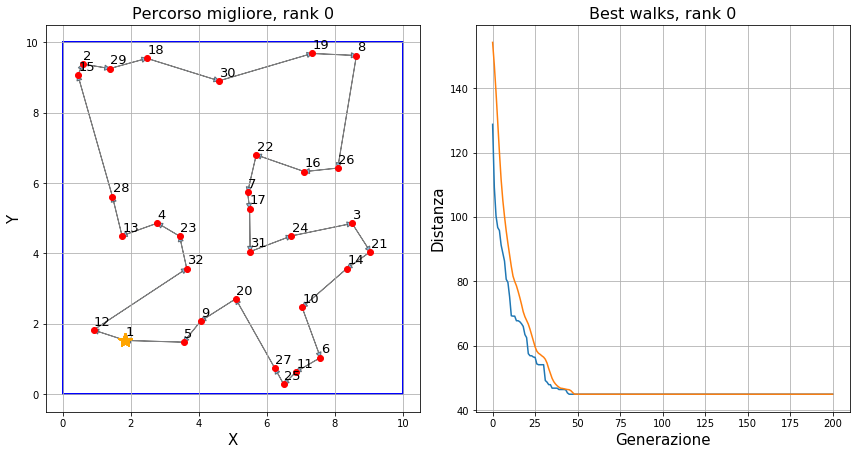


------------------------------------ RANK 1: best walk = 44.952500 ------------------------------------  



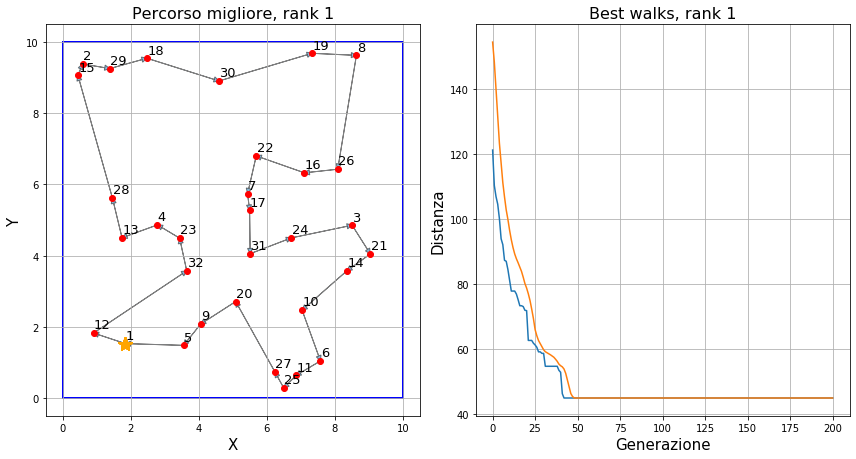


------------------------------------ RANK 2: best walk = 44.952500 ------------------------------------  



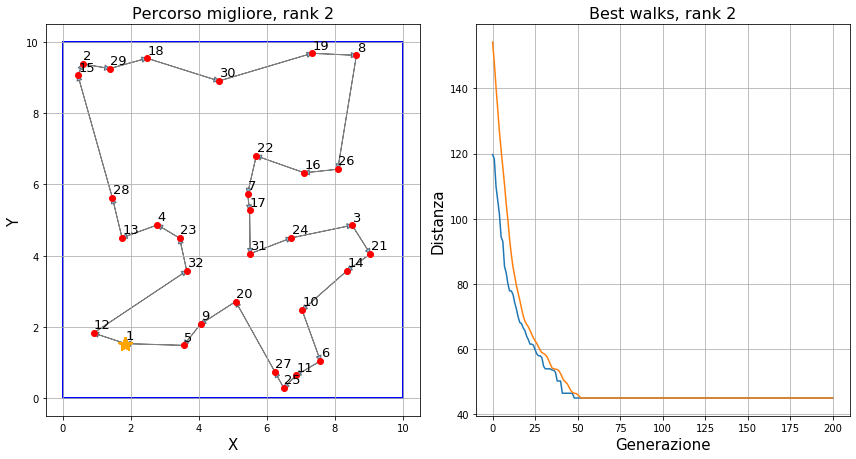


------------------------------------ RANK 3: best walk = 44.952500 ------------------------------------  



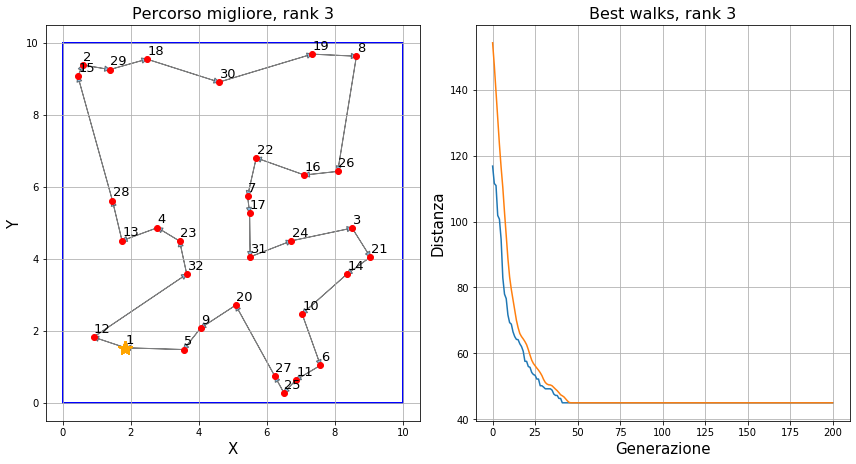

In [3]:
rect = [ plt.Rectangle((0., 0.),10,10,facecolor='none',edgecolor='b',linewidth=2.0,alpha=1) for i in range(4) ]
width = 0.001
h_w = 150*width
xlabels = ["X","Generazione"]
ylabels = ["Y","Distanza"]
gnames = ["Percorso migliore", "Best walks"]
size = 4

for rank in range(size):
    fig = plt.figure(figsize=(12, 24))
    ordS = np.genfromtxt("best_conf"+str(rank)+".txt")
    walksS = np.genfromtxt("walks"+str(rank)+".dat", usecols=0, autostrip=True)
    avgsS = np.genfromtxt("averages"+str(rank)+".dat", usecols=0, autostrip=True)
    for j in range(2):
        ax = fig.add_subplot(4, 2, 2*rank+j+1)
        ax.grid(True)
        ax.set_xlabel(xlabels[j], fontsize=15)
        ax.set_ylabel(ylabels[j], fontsize=15)
        ax.set_title("%s, rank %d" % (gnames[j],rank), fontsize=16)
        if j == 0:
            ax.add_patch(rect[rank])
            for i in range(len(x)):
                ap = int(ordS[i]-1)
                ax.plot(x[ap], y[ap],'ro')
                ax.plot(x[0],y[0],'*', markersize=15, color='orange')
                ax.annotate(int(ordS[i]),(x[ap],y[ap]),xytext=(x[ap]+0.01, y[ap]+0.13), size=13)
                if i == len(x)-1:
                    ax.arrow(x[ap], y[ap], x[0]-x[ap], y[0]-y[ap], width=width, head_width=h_w,
                             head_length=h_w, length_includes_head=True, alpha=0.5)
                else:
                    ap2 = int(ordS[i+1]-1)
                    ax.arrow(x[ap], y[ap], x[ap2]-x[ap], y[ap2]-y[ap], width=width, head_width=h_w,
                             head_length=h_w, length_includes_head=True, alpha=0.5)
        else:
            ax.plot(walksS, label="Best walk in ogni generazione")
            ax.plot(avgsS, label='Cammino medio sulla migliore metà della popolazione')
    print("\n------------------------------------"+
          " RANK %d: best walk = %f ------------------------------------  \n" % (rank, min(walksS)) )
    fig.tight_layout()
    plt.show()